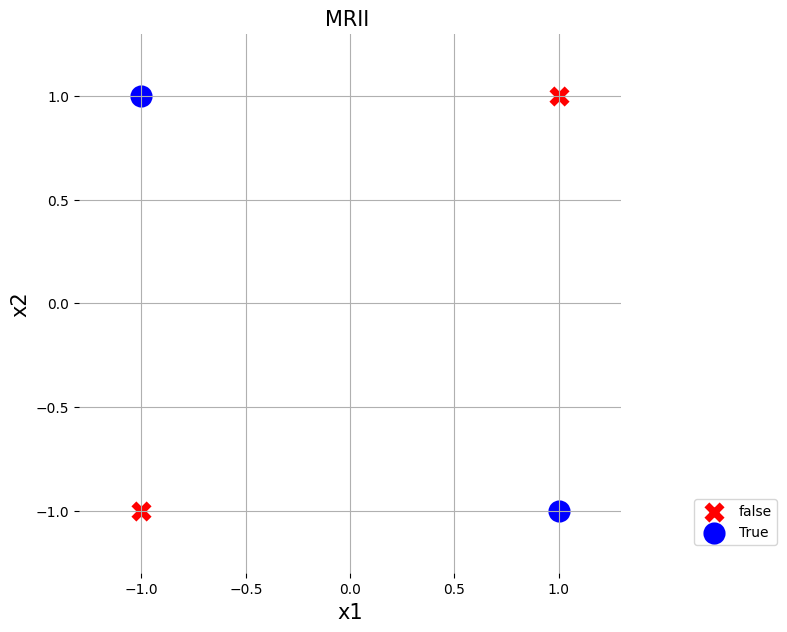

In [3]:
# Este codigo solo muestra los puntos clasifiacados segun su clase
import numpy as np
import matplotlib.pyplot as plt

# compuerta AND ->   [x1, x2]
individuo = np.array([[1, 1],       # Clase -1 (False)
                      [1, -1],      # Clase 1 (True)
                      [-1, 1],      # Clase 1 (True)
                      [-1, -1],     # Clase -1 (False)
                              ])
                # 1 : true    -1 : false
clases = np.array([-1, 1, 1, -1])

# Gráfica de dispersión (x1, x2)
plt.figure(figsize=(7, 7))
plt.title("MRII ", fontsize=15)
plt.scatter(individuo [clases == -1].T[0], 
            individuo [clases == -1].T[1], 
            marker="x", s=120, color="red",
            linewidths=5, label="false")
plt.scatter(individuo [clases == 1].T[0],
            individuo [clases == 1].T[1], 
            marker="o", s=120, color="blue",
            linewidths=5, label="True")
plt.xlabel("x1", fontsize=15)
plt.ylabel("x2", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((-1.3, 1.3))
plt.ylim((-1.3, 1.3))
plt.grid()
plt.show()

In [9]:
def funcion_activacion_bipolar(num):
  """
  Evalúa un número y retorna 1 si es mayor o igual a 0, y -1 si es menor.
  """
  if num >= 0:
    return 1
  else:
    return -1

In [19]:
# Este codigo ejecuta las epocas definidas en el while.
# Evalua la funcion de activacion y verifica si la prediccion es correcta
# y grafica aciertos por epoca

# pesos    se pueden cambiar
w =np.array( [[0.05, 0.1], 
              [0.2,  0.2], 
                        ])
v =np.array( [[0.5], 
              [0.5], 
                  ])
# bias   se puede cambiar
b1 = 0.3
b2 = 0.15
b3 = 0.5
# parámetro de aprendizaje  se puede cambiar
pa =0.5
# épocas 
epocas = 0
contaSinError = 0
longitud = len(clases)
numEpocas=30 # aqui se cambia el numero de epocas
# guarda los aciertos de cada epoca
aciertos = []
while epocas != numEpocas:   
    print("\n--- Epoca:", epocas+1, "---")
    for i in range(individuo.shape[0]):
        print("_Iteracion: ", i + 1,"_")  # Imprimir el índice de la fila
        print("num1: ", individuo[i, 0], "num2: ", individuo[i, 1])
        print("w11: ", w[0, 0], "w21: ", w[1, 0])
        z1 = (w[0,0] * individuo[i, 0] + w[1, 0] * individuo[i, 1]) + b1
        print("z1:", z1)
        print("w21: ", w[0, 1], "w22: ", w[1,1])
        z2 = (w[0, 1] * individuo[i, 0] + w[1,1] * individuo[i, 1]) + b2
        print("z2:", z2)
        y =  funcion_activacion_bipolar(z1)*v[0, 0]+(funcion_activacion_bipolar(z2)*v[1, 0])+b3
        print("y:", y)
        
        if funcion_activacion_bipolar(y) == clases[i]:
            print("No actualizo pesos, ni bias")
            contaSinError += 1
        else:
            if z1 < z2:
                print("z1 es menor, actualizo sus pesos y bias")
                w[0, 0] = w[0, 0] + pa * (clases[i] - z1) * individuo[i, 0]
                w[1, 0] = w[1, 0] + pa * (clases[i] - z1) * individuo[i, 1]
                b1 = b1 + pa * (clases[i] - z1)
                print("w11_new:", w[0, 0], "w21_new:", w[1, 0], "b1_new:", b1)
            else:
                print("z2 es menor, actualizo sus pesos y bias")
                w[0, 1] = w[0, 1] + pa * (clases[i] - z2) * individuo[i, 0]
                w[1, 1] = w[1, 1] + pa * (clases[i] - z2) * individuo[i, 1]
                b2 = b2 + pa * (clases[i] - z2)
                print("w12_new:", w[0, 1], "w22_new:", w[1, 1], "b2_new:", b2)

    # Incrementar épocas después de recorrer todos los individuos
    epocas += 1
    print("Epocas:", epocas, "Clasifico correctamente:", contaSinError, "de",longitud)
    aciertos.append(contaSinError)
    # print("aciertos [epocas]:", "[",aciertos,"]") # muestra los valores de el arreglo aciertos
    contaSinError = 0



--- Epoca: 1 ---
_Iteracion:  1 _
num1:  1 num2:  1
w11:  0.05 w21:  0.2
z1: 0.55
w21:  0.1 w22:  0.2
z2: 0.45000000000000007
y: 1.5
z2 es menor, actualizo sus pesos y bias
w12_new: -0.6250000000000001 w22_new: -0.5250000000000001 b2_new: -0.5750000000000001
_Iteracion:  2 _
num1:  1 num2:  -1
w11:  0.05 w21:  0.2
z1: 0.14999999999999997
w21:  -0.6250000000000001 w22:  -0.5250000000000001
z2: -0.675
y: 0.5
No actualizo pesos, ni bias
_Iteracion:  3 _
num1:  -1 num2:  1
w11:  0.05 w21:  0.2
z1: 0.45
w21:  -0.6250000000000001 w22:  -0.5250000000000001
z2: -0.4750000000000001
y: 0.5
No actualizo pesos, ni bias
_Iteracion:  4 _
num1:  -1 num2:  -1
w11:  0.05 w21:  0.2
z1: 0.04999999999999999
w21:  -0.6250000000000001 w22:  -0.5250000000000001
z2: 0.5750000000000003
y: 1.5
z1 es menor, actualizo sus pesos y bias
w11_new: 0.5750000000000001 w21_new: 0.7250000000000001 b1_new: -0.22500000000000003
Epocas: 1 Clasifico correctamente: 2 de 4

--- Epoca: 2 ---
_Iteracion:  1 _
num1:  1 num2:  1


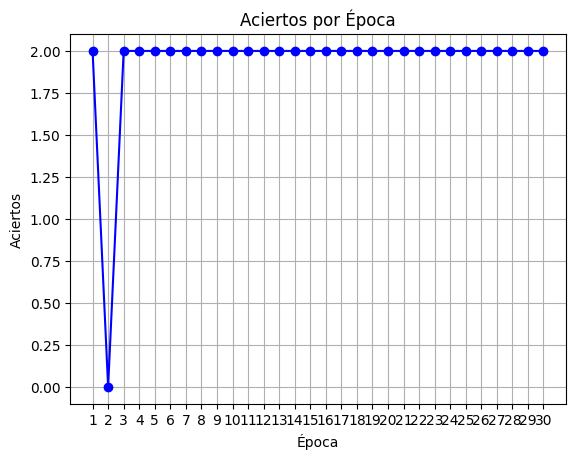

In [20]:
# Crear la gráfica de aciertos por epoca
epocas = range(1, len(aciertos) + 1)
plt.plot(epocas, aciertos, marker='o', linestyle='-', color='b')  # Línea con puntos marcados
plt.title('Aciertos por Época')  # Título de la gráfica
plt.xlabel('Época')  # Etiqueta del eje X
plt.ylabel('Aciertos')  # Etiqueta del eje Y
plt.grid(True)  # Agregar una cuadrícula para mejor visualización
plt.xticks(epocas)  # Asegurar que las épocas se muestren correctamente en el eje X
plt.show()  # Mostrar la gráfica

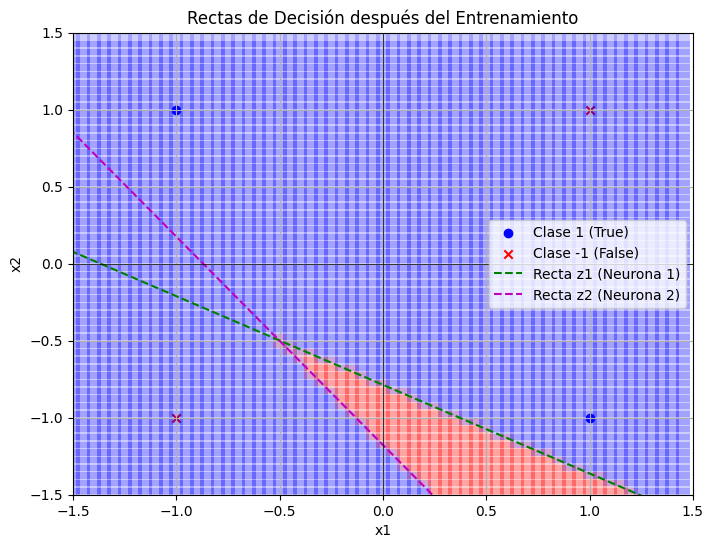

In [33]:
# Extraer pesos finales
w11, w12 = w[0, 0], w[0, 1]
w21, w22 = w[1, 0], w[1, 1]

# Definir las rectas de decisión
def recta_z1(x1):
    return (-w11 * x1 - b1) / w21

def recta_z2(x1):
    return (-w12 * x1 - b2) / w22

# Crear un rango de valores para x1
x1_range = np.linspace(-2, 2, 100)

# Calcular x2 para cada recta
x2_z1 = recta_z1(x1_range)
x2_z2 = recta_z2(x1_range)

# Graficar los puntos de entrada
plt.figure(figsize=(8, 6))
plt.scatter(individuo[clases == 1, 0], individuo[clases == 1, 1], color='blue', label='Clase 1 (True)')
plt.scatter(individuo[clases == -1, 0], individuo[clases == -1, 1], marker="x",color='red', label='Clase -1 (False)')

# Graficar las rectas de decisión
plt.plot(x1_range, x2_z1, 'g--', label='Recta z1 (Neurona 1)')
plt.plot(x1_range, x2_z2, 'm--', label='Recta z2 (Neurona 2)')
# --------------------------------------------------------------------------------
# Generar y graficar la región de decisión
for x1 in np.arange(-1.5, 1.5, 0.05):
    for x2 in np.arange(-1.5, 1.5, 0.05):
        # Calcular z1 y z2 para cada punto (x1, x2)
        z1 = w[0, 0] * x1 + w[1, 0] * x2 + b1
        z2 = w[0, 1] * x1 + w[1, 1] * x2 + b2
        y = funcion_activacion_bipolar(z1) * v[0, 0] + funcion_activacion_bipolar(z2) * v[1, 0] + b3
        
        # Determinar el color según la clase predicha
        color = "blue" if y >= 0 else "red"
        
        # Graficar el punto (región de decisión)
        plt.scatter(x1, x2, marker="s", s=110, color=color, alpha=0.2, linewidths=0)
# --------------------------------------------------------------------------------
# Añadir etiquetas y leyenda
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Rectas de Decisión después del Entrenamiento')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

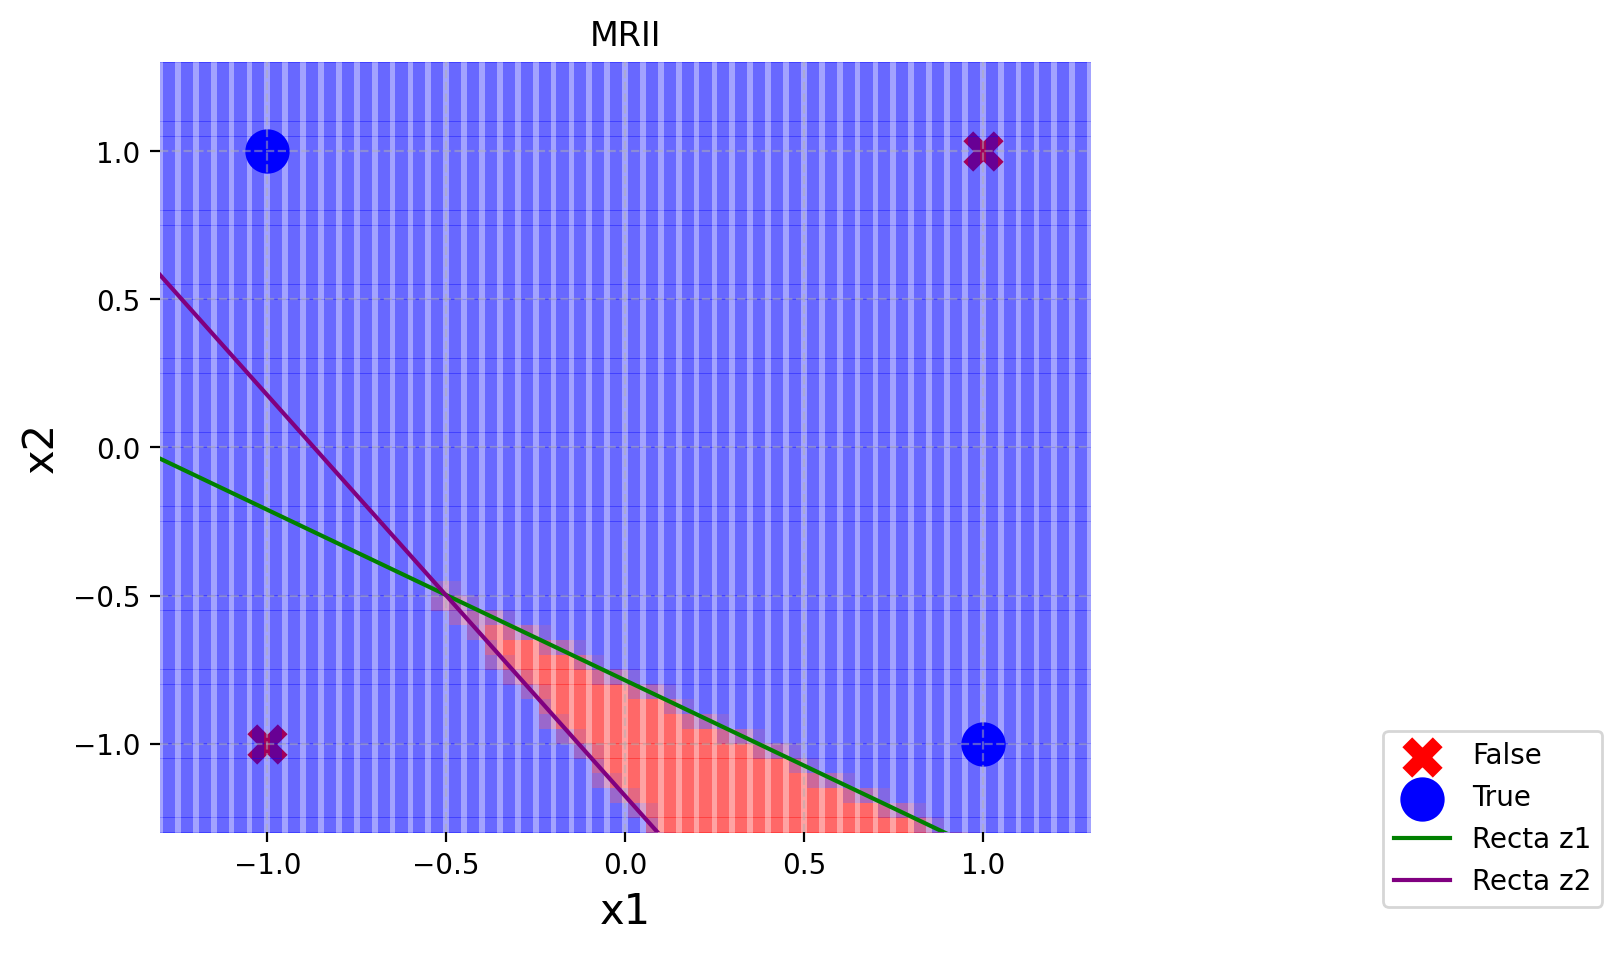

In [26]:
def validar_entrada(mensaje):
    while True:
        try:
            valor = float(input(mensaje))
            if -1 <= valor <= 1.9:
                return valor
            else:
                print("Error: El valor debe estar entre -1 y 1. Intente nuevamente.")
        except ValueError:
            print("Error: Ingrese un número válido.")

# Crear la figura
plt.figure(figsize=(6, 5), dpi=200)
plt.title("MRII", fontsize=12)

# Graficar los puntos de entrada
plt.scatter(individuo[clases == -1].T[0], 
            individuo[clases == -1].T[1], 
            marker="x", s=120, color="red",
            linewidths=5, label="False")
plt.scatter(individuo[clases == 1].T[0],
            individuo[clases == 1].T[1], 
            marker="o", s=120, color="blue",
            linewidths=5, label="True")

# Generar y graficar la región de decisión
for x1 in np.arange(-1.5, 1.5, 0.05):
    for x2 in np.arange(-1.5, 1.5, 0.05):
        # Calcular z1 y z2 para cada punto (x1, x2)
        z1 = w[0, 0] * x1 + w[1, 0] * x2 + b1
        z2 = w[0, 1] * x1 + w[1, 1] * x2 + b2
        y = funcion_activacion_bipolar(z1) * v[0, 0] + funcion_activacion_bipolar(z2) * v[1, 0] + b3
        
        # Determinar el color según la clase predicha
        color = "blue" if y >= 0 else "red"
        
        # Graficar el punto (región de decisión)
        plt.scatter(x1, x2, marker="s", s=110, color=color, alpha=0.2, linewidths=0)

# Calcular y graficar la recta de z1 (Neurona 1)
x1_range = np.linspace(-1.5, 1.5, 100)
x2_z1 = (-w[0, 0] * x1_range - b1) / w[1, 0]  # Despeje de z1 = 0
plt.plot(x1_range, x2_z1, color="green", label="Recta z1")

# Calcular y graficar la recta de z2 (Neurona 2)
x2_z2 = (-w[0, 1] * x1_range - b2) / w[1, 1]  # Despeje de z2 = 0
plt.plot(x1_range, x2_z2, color="purple", label="Recta z2")

# Configuraciones adicionales del gráfico
plt.xlabel("x1", fontsize=15)
plt.ylabel("x2", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((-1.3, 1.3))
plt.ylim((-1.3, 1.3))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [32]:
# Función para validar entrada (asegura que los valores estén entre -1 y 1)
def validar_entrada(mensaje):
    while True:
        try:
            valor = float(input(mensaje))
            if -1 <= valor <= 1:
                return valor
            else:
                print("Error: El valor debe estar entre -1 y 1.")
        except ValueError:
            print("Error: Ingrese un número válido.")

# Solicitar valores x1 y x2 al usuario
x1 = validar_entrada("Ingrese x1 (entre -1 y 1): ")
x2 = validar_entrada("Ingrese x2 (entre -1 y 1): ")

# Calcular z1 y z2 (neuronas ocultas)
z1 = w[0, 0] * x1 + w[1, 0] * x2 + b1
z2 = w[0, 1] * x1 + w[1, 1] * x2 + b2

# Calcular la salida de la red (y)
y = funcion_activacion_bipolar(z1) * v[0, 0] + funcion_activacion_bipolar(z2) * v[1, 0] + b3

# Determinar la clase
if y >= 0:
    print("Pertenece a la Clase: True (1)")
else:
    print("Pertenece a la Clase: False (-1)")

Ingrese x1 (entre -1 y 1):  0.2
Ingrese x2 (entre -1 y 1):  -1


Pertenece a la Clase: False (-1)
